## 2.3.6　決定木のアンサンブル法

In [1]:
import os
import mglearn
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (5, 5)

In [3]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [4]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

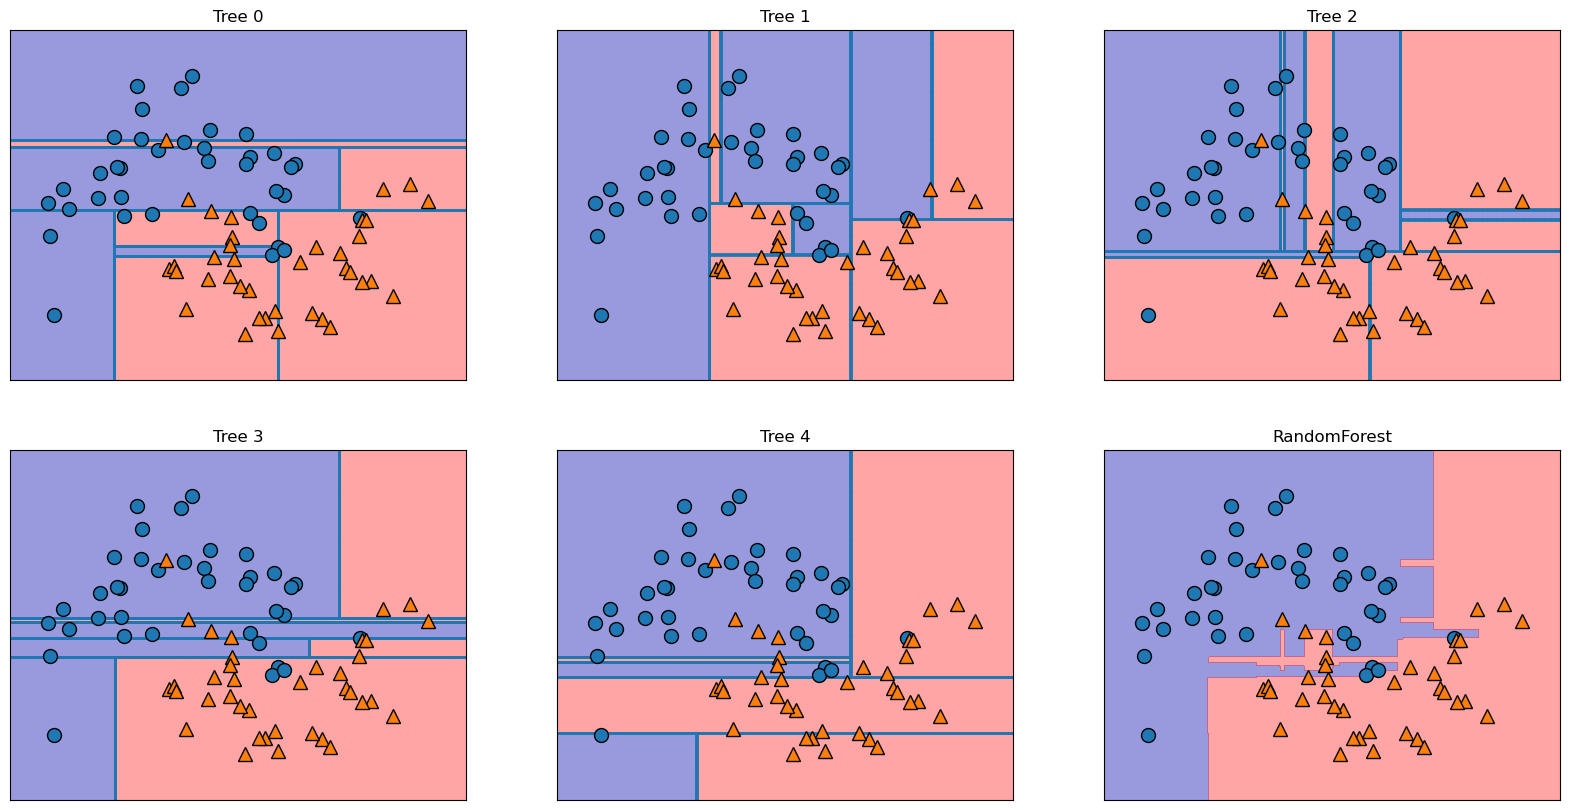

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('RandomForest')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [6]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [7]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


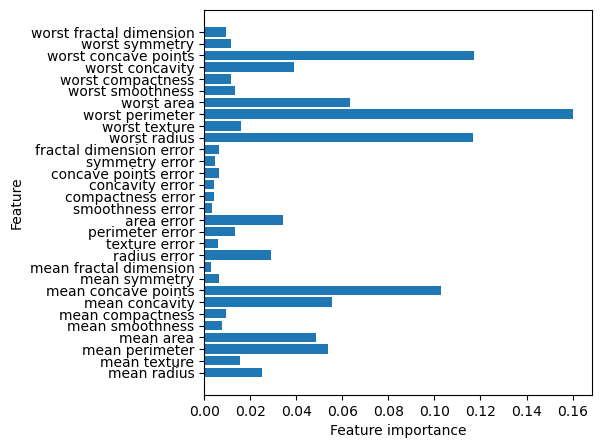

In [8]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer
               .feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    
plot_feature_importances_cancer(forest)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [10]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('Accuracy Training set score: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy Test set score: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy Training set score: 1.000
Accuracy Test set score: 0.965


In [11]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print('Accuracy Training set score: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy Test set score: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy Training set score: 0.991
Accuracy Test set score: 0.972


In [12]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print('Accuracy Training set score: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy Test set score: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy Training set score: 0.988
Accuracy Test set score: 0.965


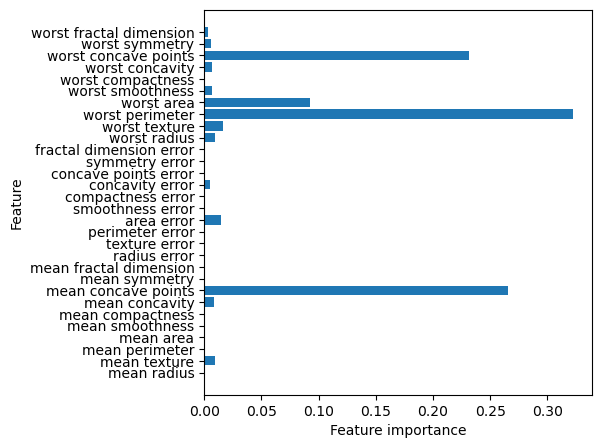

In [13]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)